In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Netflix data
netflix_data = pd.read_csv('../data/Mod10/netflix.csv')

# Display first few rows to understand structure
netflix_data.head()


,date,high,low,open,close,volume,adj_close
0,2019-01-02,269.750000,256.579987,259.279999,267.660004,11679500,267.660004
1,2019-01-03,275.790009,264.429993,270.200012,271.200012,14969600,271.200012
2,2019-01-04,297.799988,278.540009,281.880005,297.570007,19330100,297.570007
3,2019-01-07,316.799988,301.649994,302.100006,315.339996,18620100,315.339996
4,2019-01-08,320.589996,308.010010,319.980011,320.269989,15359200,320.269989


In [2]:
"""
This code filters Netflix data to only include entries between January 2019 and December 2020, 
then calculates pivot points, support, and resistance levels for the closing stock prices during 
this period. These calculations help in technical analysis by identifying key price levels for 
potential market trends.
"""

# Filter data from 2019 through the end of 2020
netflix_data['date'] = pd.to_datetime(netflix_data['date'])
filtered_data = netflix_data[(netflix_data['date'] >= '2019-01-01') & (netflix_data['date'] <= '2020-12-31')]

# Extract closing prices for the filtered data
close_prices_filtered = filtered_data['close']

# Calculate pivot point
pivot_point_filtered = (close_prices_filtered.max() + close_prices_filtered.min() + close_prices_filtered.iloc[-1]) / 3

# Calculate support and resistance levels
resistance_1_filtered = (2 * pivot_point_filtered) - close_prices_filtered.min()
resistance_2_filtered = pivot_point_filtered + (close_prices_filtered.max() - close_prices_filtered.min())
resistance_3_filtered = close_prices_filtered.max() + 2 * (pivot_point_filtered - close_prices_filtered.min())

support_1_filtered = (2 * pivot_point_filtered) - close_prices_filtered.max()
support_2_filtered = pivot_point_filtered - (close_prices_filtered.max() - close_prices_filtered.min())
support_3_filtered = close_prices_filtered.min() - 2 * (close_prices_filtered.max() - pivot_point_filtered)


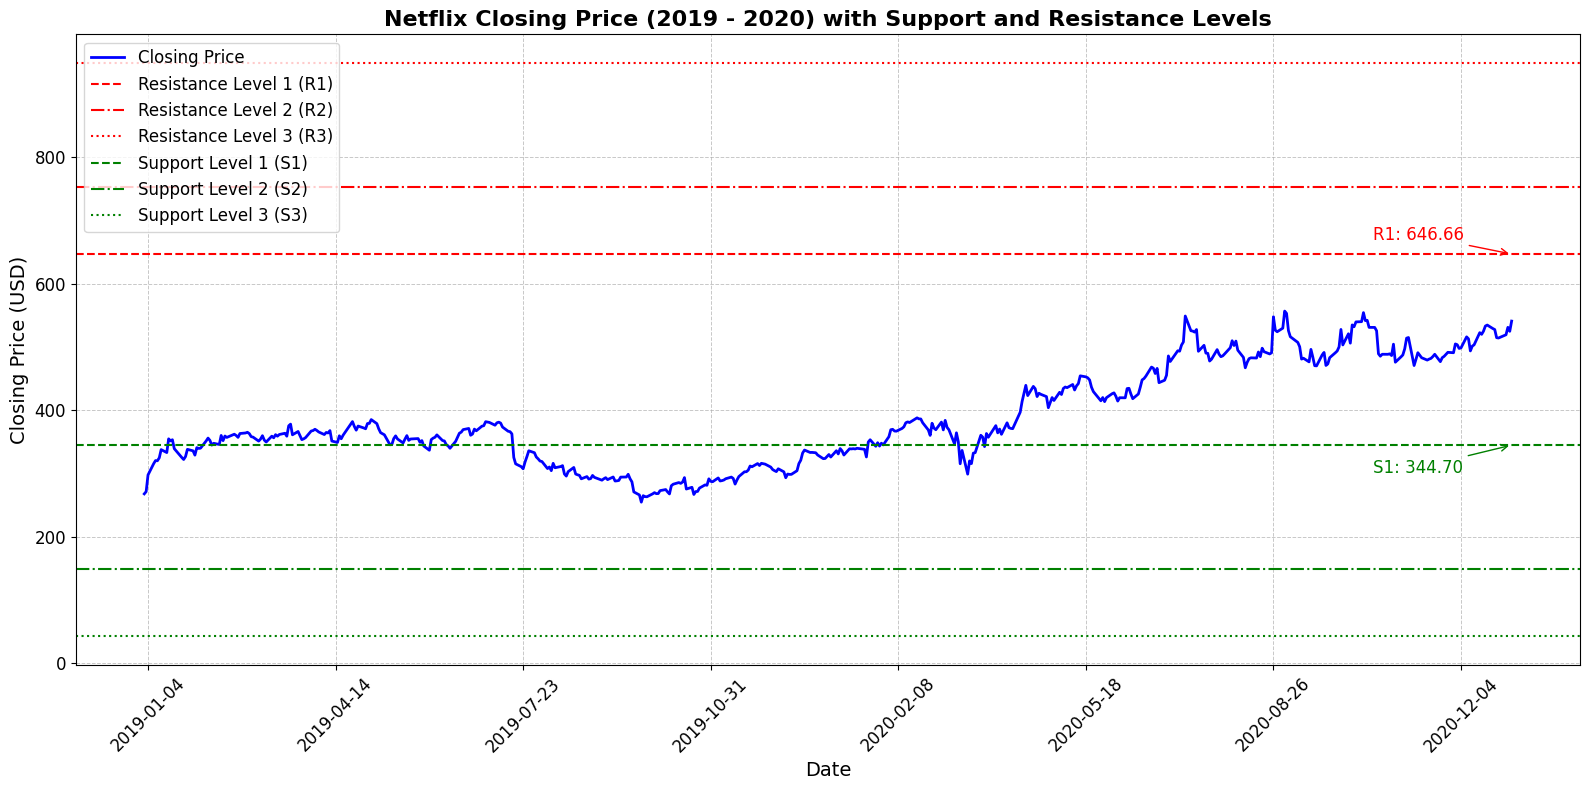

In [3]:
"""
This code creates a visualization of Netflix's closing stock prices from 2019 to 2020, including support 
and resistance levels for better technical analysis. The plot includes enhanced styling for readability, 
such as more spaced-out dates, gridlines, and annotations to highlight key levels in the data.
"""

# Improved visualization with more spaced-out dates
plt.figure(figsize=(16, 8))
plt.plot(filtered_data['date'], close_prices_filtered, label='Closing Price', color='blue', linewidth=2)

# Plot resistance levels with improved styles
plt.axhline(resistance_1_filtered, color='red', linestyle='--', linewidth=1.5, label='Resistance Level 1 (R1)')
plt.axhline(resistance_2_filtered, color='red', linestyle='-.', linewidth=1.5, label='Resistance Level 2 (R2)')
plt.axhline(resistance_3_filtered, color='red', linestyle=':', linewidth=1.5, label='Resistance Level 3 (R3)')

# Plot support levels with improved styles
plt.axhline(support_1_filtered, color='green', linestyle='--', linewidth=1.5, label='Support Level 1 (S1)')
plt.axhline(support_2_filtered, color='green', linestyle='-.', linewidth=1.5, label='Support Level 2 (S2)')
plt.axhline(support_3_filtered, color='green', linestyle=':', linewidth=1.5, label='Support Level 3 (S3)')

# Enhancements for readability
plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing Price (USD)', fontsize=14)
plt.title('Netflix Closing Price (2019 - 2020) with Support and Resistance Levels', fontsize=16, fontweight='bold')

# Use a date locator to spread out the date labels for better readability
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))  # Set max number of x-axis labels to 10 for better spacing
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

# Adding annotations for key points
plt.annotate(f'R1: {resistance_1_filtered:.2f}', xy=(filtered_data['date'].iloc[-1], resistance_1_filtered),
             xytext=(-100, 10), textcoords='offset points', arrowprops=dict(arrowstyle='->', color='red'), fontsize=12, color='red')
plt.annotate(f'S1: {support_1_filtered:.2f}', xy=(filtered_data['date'].iloc[-1], support_1_filtered),
             xytext=(-100, -20), textcoords='offset points', arrowprops=dict(arrowstyle='->', color='green'), fontsize=12, color='green')

# Tight layout for better spacing
plt.tight_layout()

# Show the improved plot
plt.show()


In [4]:
# Load the FAANG stocks data
amazon_data = pd.read_csv('../data/Mod10/amazon.csv')
apple_data = pd.read_csv('../data/Mod10/apple.csv')
facebook_data = pd.read_csv('../data/Mod10/facebook.csv')
google_data = pd.read_csv('../data/Mod10/google.csv')

# Display the first few rows of each dataset to understand their structure
amazon_data_head = amazon_data.head()
apple_data_head = apple_data.head()
facebook_data_head = facebook_data.head()
google_data_head = google_data.head()

amazon_data_head, apple_data_head, facebook_data_head, google_data_head


(         date         high          low         open        close   volume  \
 0  2019-01-02  1553.359985  1460.930054  1465.199951  1539.130005  7983100   
 1  2019-01-03  1538.000000  1497.109985  1520.010010  1500.280029  6975600   
 2  2019-01-04  1594.000000  1518.310059  1530.000000  1575.390015  9182600   
 3  2019-01-07  1634.560059  1589.189941  1602.310059  1629.510010  7993200   
 4  2019-01-08  1676.609985  1616.609985  1664.689941  1656.579956  8881400   
 
      adj_close  
 0  1539.130005  
 1  1500.280029  
 2  1575.390015  
 3  1629.510010  
 4  1656.579956  ,
          date       high        low       open      close       volume  \
 0  2019-01-02  39.712502  38.557499  38.722500  39.480000  148158800.0   
 1  2019-01-03  36.430000  35.500000  35.994999  35.547501  365248800.0   
 2  2019-01-04  37.137501  35.950001  36.132500  37.064999  234428400.0   
 3  2019-01-07  37.207500  36.474998  37.174999  36.982498  219111200.0   
 4  2019-01-08  37.955002  37.130001  37

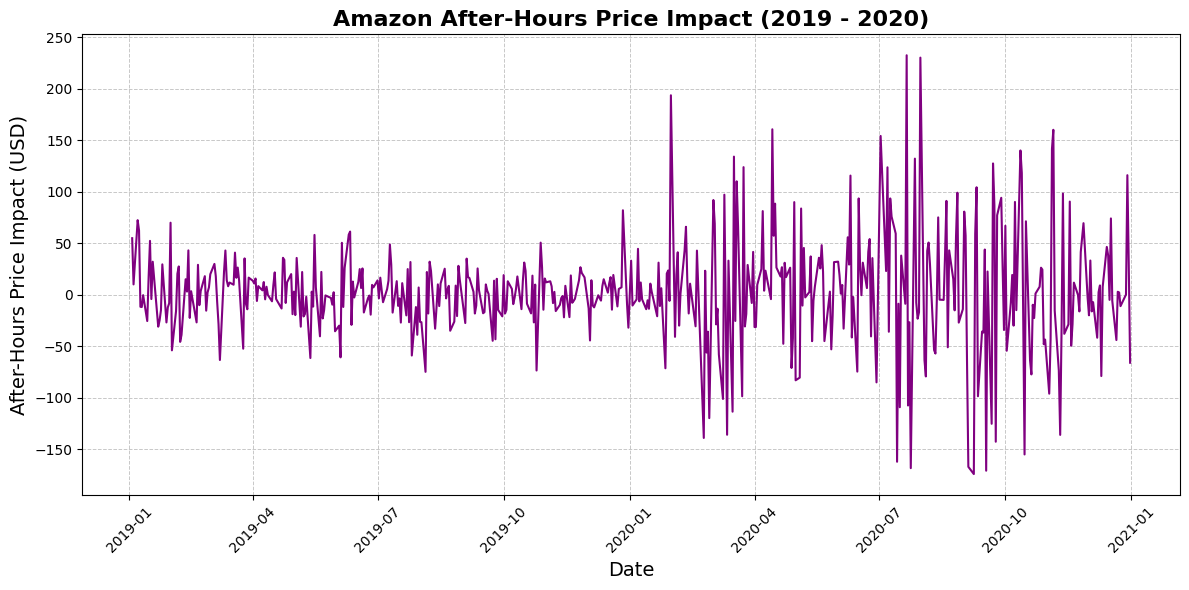

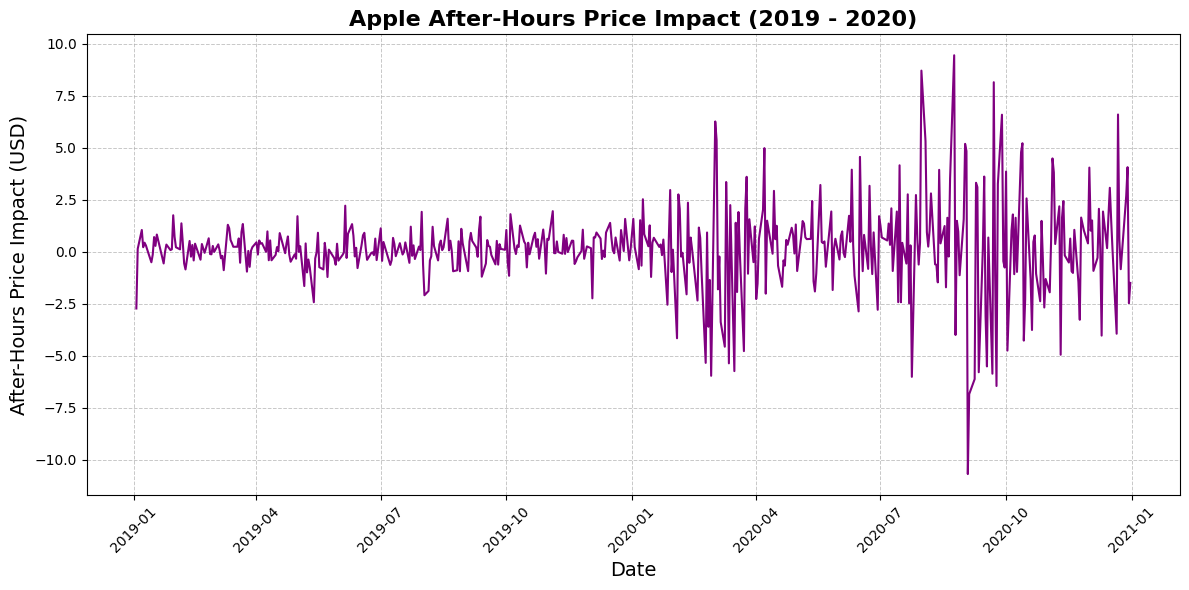

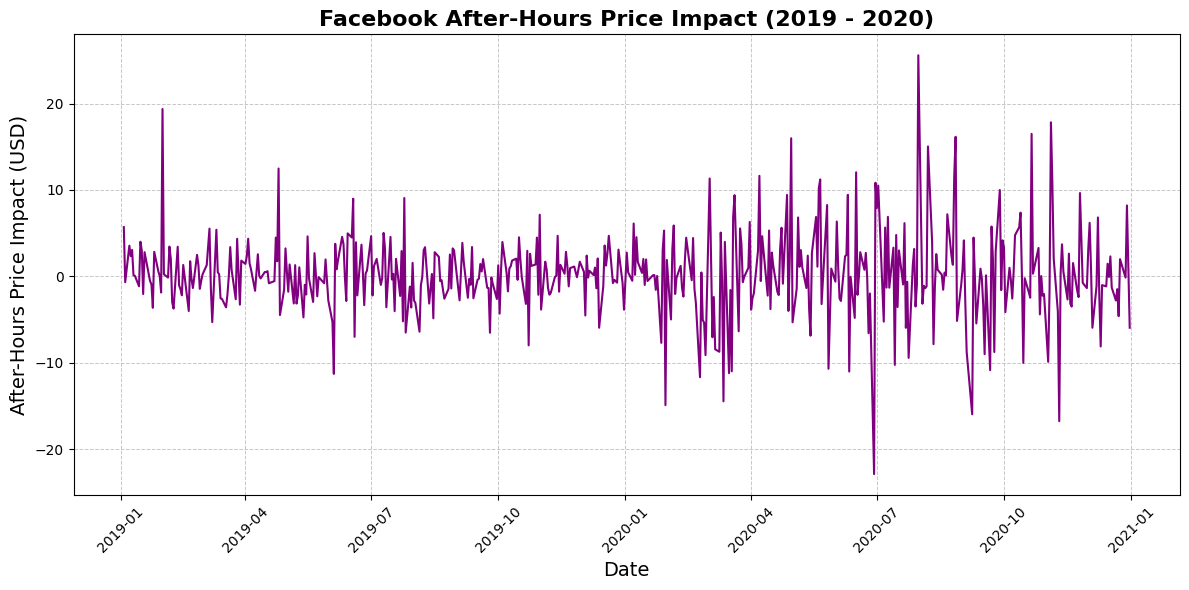

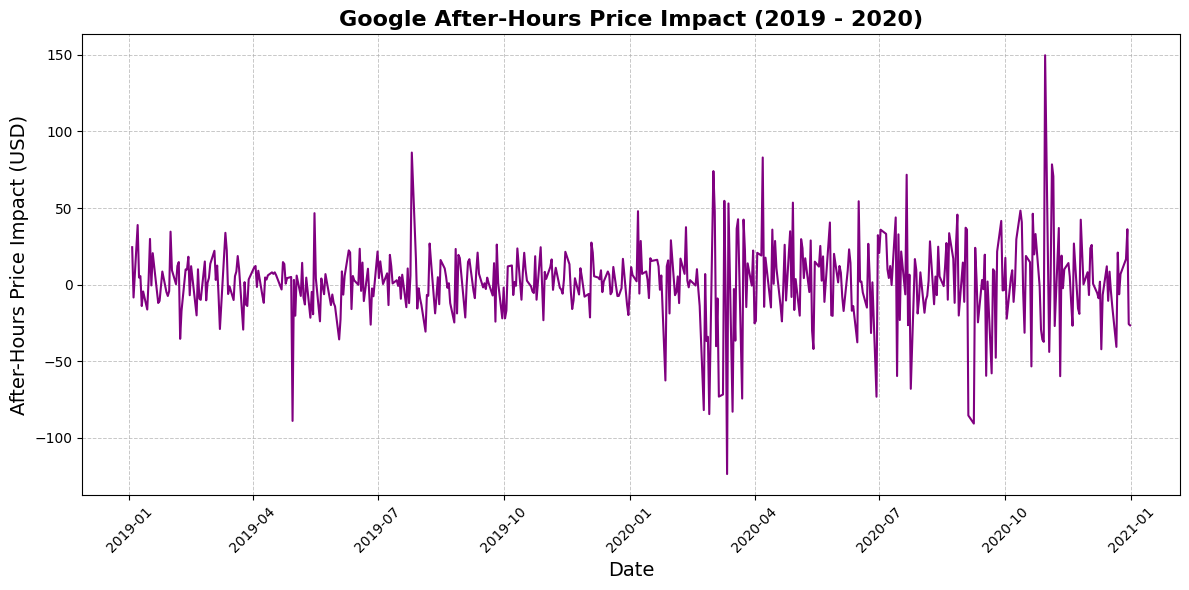

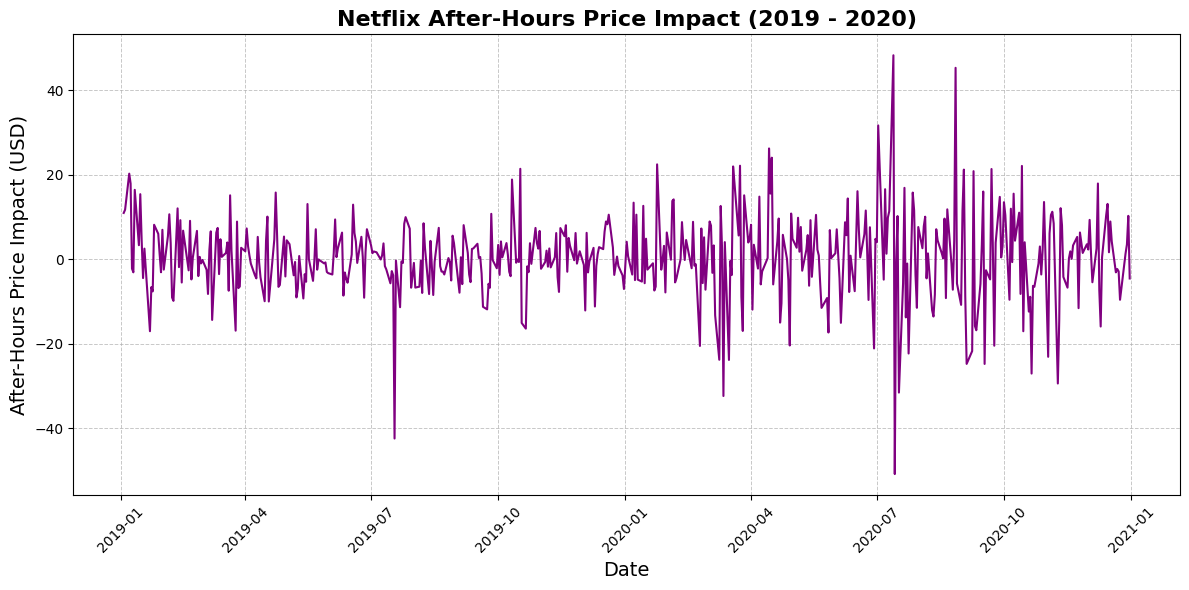

In [5]:
def calculate_after_hours_impact(stock_data, stock_name):
    """
    Calculate and visualize the after-hours price impact of a stock.

    This function takes a DataFrame containing stock data and calculates the after-hours impact, 
    which is defined as the difference between the opening price and the previous closing price.
    It then creates a plot to visualize the after-hours impact over time.

    Parameters:
    stock_data (pd.DataFrame): A DataFrame containing stock information with at least 'date', 'open', and 'close' columns.
    stock_name (str): The name of the stock, used for labeling the plot.

    Returns:
    None
    """

    # Convert date column to datetime
    stock_data['date'] = pd.to_datetime(stock_data['date'])
    # Calculate after-hours price impact as the difference between the opening price and previous closing price
    stock_data['after_hours_impact'] = stock_data['open'].diff()
    
    # Plot after-hours impact
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['date'], stock_data['after_hours_impact'], label=f'After-Hours Impact ({stock_name})', color='purple')
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('After-Hours Price Impact (USD)', fontsize=14)
    plt.title(f'{stock_name} After-Hours Price Impact (2019 - 2020)', fontsize=16, fontweight='bold')
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
    plt.tight_layout()
    plt.show()

# Calculate after-hours impact for each stock and plot the results
calculate_after_hours_impact(amazon_data, 'Amazon')
calculate_after_hours_impact(apple_data, 'Apple')
calculate_after_hours_impact(facebook_data, 'Facebook')
calculate_after_hours_impact(google_data, 'Google')
calculate_after_hours_impact(netflix_data, 'Netflix')


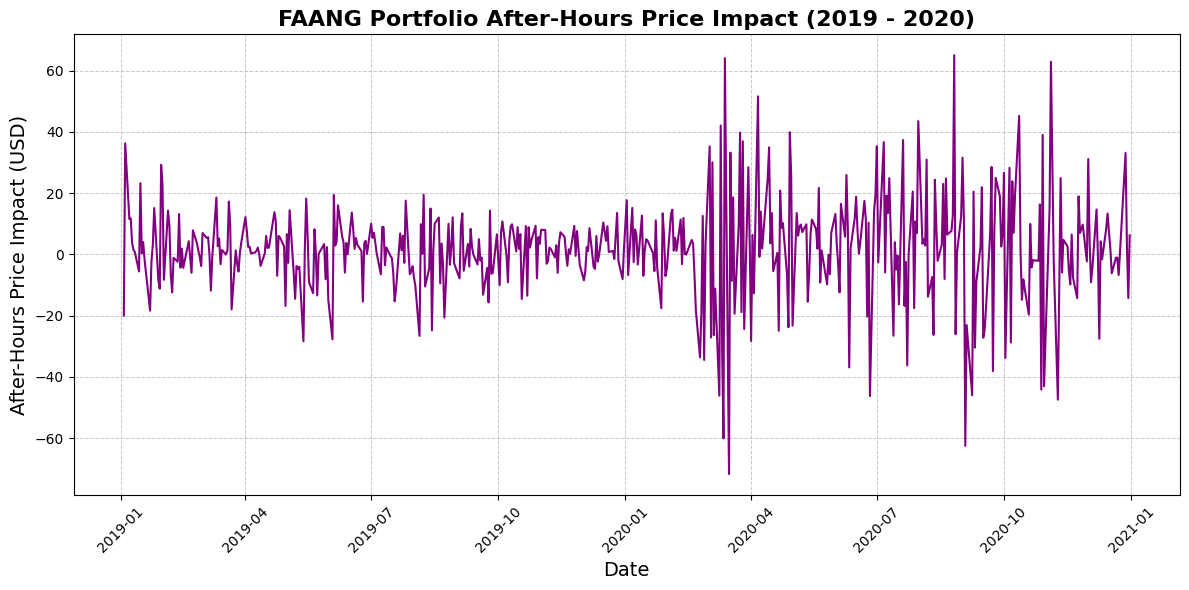

In [6]:
"""
This code snippet merges individual FAANG stock data (Amazon, Apple, Facebook, Google, and Netflix) 
into a combined DataFrame, calculates daily returns for each stock, and determines the portfolio's 
daily return and after-hours impact. Finally, it plots the after-hours price impact of the FAANG 
portfolio over the time period 2019-2020, visualizing the combined effect of after-hours trading on 
the portfolio value.
"""

# Recreate the combined_data DataFrame by merging individual FAANG stock data
combined_data = pd.merge(amazon_data[['date', 'close']], apple_data[['date', 'close']], on='date', suffixes=('_amazon', '_apple'))
combined_data = pd.merge(combined_data, facebook_data[['date', 'close']], on='date')
combined_data = pd.merge(combined_data, google_data[['date', 'close']], on='date', suffixes=('_facebook', '_google'))
combined_data = pd.merge(combined_data, netflix_data[['date', 'close']], on='date')
combined_data.columns = ['date', 'close_amazon', 'close_apple', 'close_facebook', 'close_google', 'close_netflix']

# Calculate daily returns for each stock
for stock_name in ['close_amazon', 'close_apple', 'close_facebook', 'close_google', 'close_netflix']:
    combined_data[f'return_{stock_name}'] = combined_data[stock_name].pct_change()

# Calculate the portfolio daily return as the average of all FAANG stocks' returns
combined_data['portfolio_return'] = combined_data[[f'return_{col}' for col in ['close_amazon', 'close_apple', 'close_facebook', 'close_google', 'close_netflix']]].mean(axis=1)

# Calculate after-hours impact for the portfolio (assuming after-hours impact affects returns similarly)
combined_data['portfolio_after_hours_impact'] = combined_data['portfolio_return'] * combined_data[['close_amazon', 'close_apple', 'close_facebook', 'close_google', 'close_netflix']].mean(axis=1)

# Plotting after-hours impact for the portfolio
plt.figure(figsize=(12, 6))
plt.plot(combined_data['date'], combined_data['portfolio_after_hours_impact'], label='Portfolio After-Hours Impact', color='purple')
plt.xlabel('Date', fontsize=14)
plt.ylabel('After-Hours Price Impact (USD)', fontsize=14)
plt.title('FAANG Portfolio After-Hours Price Impact (2019 - 2020)', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()


In [7]:
"""
This code converts the date columns of multiple stock dataframes to datetime format and filters 
each dataframe to keep only the common dates across all stocks. It then merges the dataframes 
based on the common dates, calculates the average open and close prices for a portfolio consisting 
of these stocks, and checks the shape of the resulting combined dataframe.
"""

# Convert the date column to datetime for each stock
amazon_data['date'] = pd.to_datetime(amazon_data['date'])
apple_data['date'] = pd.to_datetime(apple_data['date'])
facebook_data['date'] = pd.to_datetime(facebook_data['date'])
google_data['date'] = pd.to_datetime(google_data['date'])
netflix_data['date'] = pd.to_datetime(netflix_data['date'])

# Find the intersection of all dates to ensure alignment
common_dates = set(amazon_data['date']).intersection(
    set(apple_data['date']),
    set(facebook_data['date']),
    set(google_data['date']),
    set(netflix_data['date'])
)

# Filter each DataFrame to keep only the common dates
amazon_data = amazon_data[amazon_data['date'].isin(common_dates)]
apple_data = apple_data[apple_data['date'].isin(common_dates)]
facebook_data = facebook_data[facebook_data['date'].isin(common_dates)]
google_data = google_data[google_data['date'].isin(common_dates)]
netflix_data = netflix_data[netflix_data['date'].isin(common_dates)]

# Re-merge the filtered data
combined_data = pd.merge(amazon_data[['date', 'open', 'close']], apple_data[['date', 'open', 'close']], on='date', suffixes=('_amazon', '_apple'))
combined_data = pd.merge(combined_data, facebook_data[['date', 'open', 'close']], on='date')
combined_data = pd.merge(combined_data, google_data[['date', 'open', 'close']], on='date', suffixes=('_facebook', '_google'))
combined_data = pd.merge(combined_data, netflix_data[['date', 'open', 'close']], on='date')
combined_data.columns = [
    'date', 'open_amazon', 'close_amazon', 'open_apple', 'close_apple',
    'open_facebook', 'close_facebook', 'open_google', 'close_google',
    'open_netflix', 'close_netflix'
]

# Recalculate portfolio open and close prices
combined_data['portfolio_open'] = combined_data[['open_amazon', 'open_apple', 'open_facebook', 'open_google', 'open_netflix']].mean(axis=1)
combined_data['portfolio_close'] = combined_data[['close_amazon', 'close_apple', 'close_facebook', 'close_google', 'close_netflix']].mean(axis=1)

# Check the new number of rows
combined_data.shape


(504, 13)

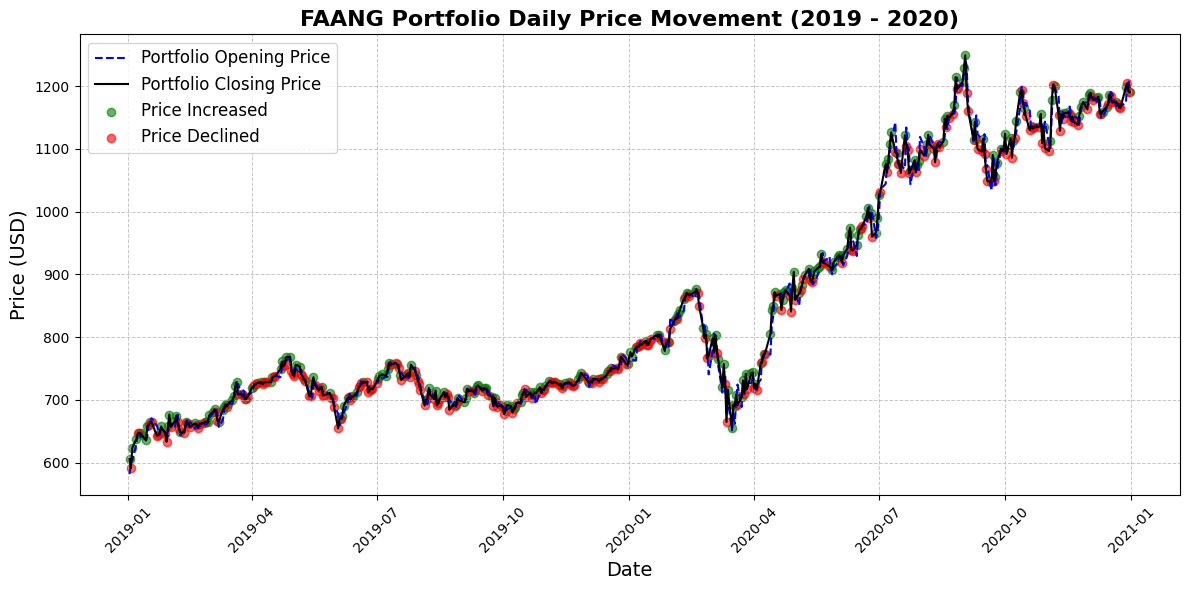

In [8]:
"""
This code visualizes the daily price movement of a FAANG portfolio from 2019 to 2020 by plotting the 
opening and closing prices. Scatter plots highlight days when the closing price increased (in green) or 
declined (in red) compared to the opening price.
"""

# Plotting the difference between opening and closing prices for FAANG portfolio without using fill_between()
plt.figure(figsize=(12, 6))
plt.plot(combined_data['date'], combined_data['portfolio_open'], label='Portfolio Opening Price', color='blue', linestyle='--')
plt.plot(combined_data['date'], combined_data['portfolio_close'], label='Portfolio Closing Price', color='black', linestyle='-')

# Highlighting days with price increase and decline using scatter plots
price_increased = combined_data[combined_data['portfolio_close'] >= combined_data['portfolio_open']]
price_declined = combined_data[combined_data['portfolio_close'] < combined_data['portfolio_open']]

plt.scatter(price_increased['date'], price_increased['portfolio_close'], color='green', alpha=0.6, label='Price Increased')
plt.scatter(price_declined['date'], price_declined['portfolio_close'], color='red', alpha=0.6, label='Price Declined')

# Adding plot labels and legend
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.title('FAANG Portfolio Daily Price Movement (2019 - 2020)', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()


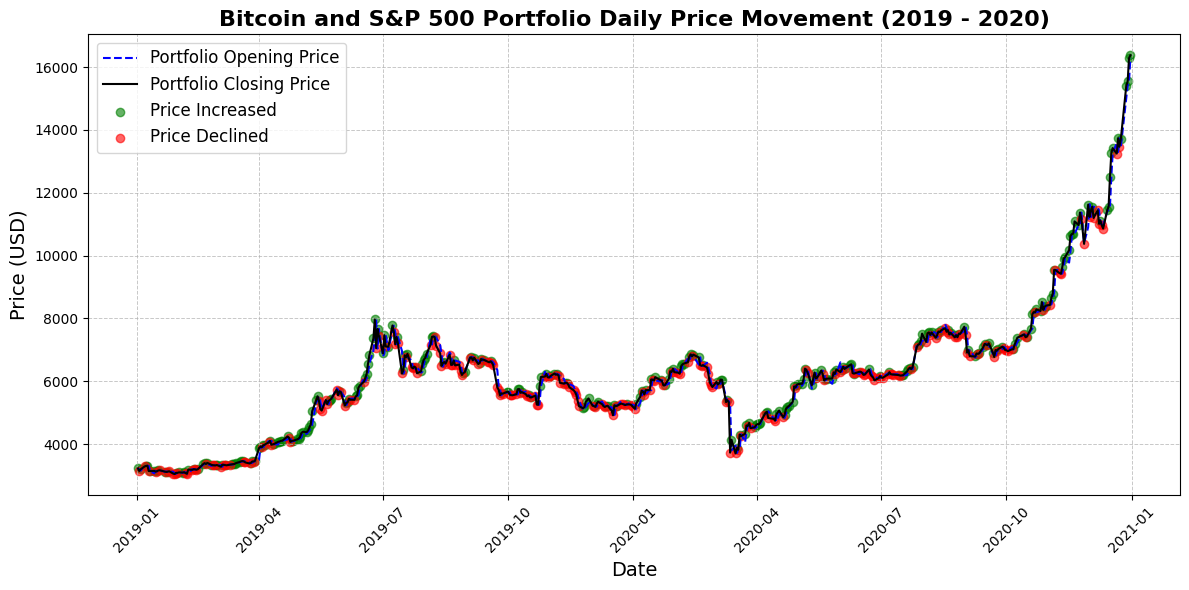

In [9]:
"""
This code loads and aligns Bitcoin and S&P 500 data based on common dates, calculates portfolio 
opening and closing prices by averaging the two, and visualizes daily price movement from 2019 to 
2020, highlighting days of price increase and decline using scatter plots. The plot shows portfolio 
opening and closing prices, with specific points marked where price trends changed.
"""

# Load Bitcoin and S&P 500 data
bitcoin_data = pd.read_csv('../data/Mod10/bitcoin.csv')
sp500_data = pd.read_csv('../data/Mod10/sp500.csv')

# Convert date columns to datetime
bitcoin_data['date'] = pd.to_datetime(bitcoin_data['date'])
sp500_data['date'] = pd.to_datetime(sp500_data['date'])

# Find the intersection of dates to ensure alignment
common_dates_other = set(bitcoin_data['date']).intersection(set(sp500_data['date']))

# Filter each DataFrame to keep only the common dates
bitcoin_data = bitcoin_data[bitcoin_data['date'].isin(common_dates_other)]
sp500_data = sp500_data[sp500_data['date'].isin(common_dates_other)]

# Merge Bitcoin and S&P 500 data
combined_other = pd.merge(bitcoin_data[['date', 'open', 'close']], sp500_data[['date', 'open', 'close']], on='date', suffixes=('_bitcoin', '_sp500'))

# Calculate portfolio opening and closing prices as the average of Bitcoin and S&P 500
combined_other['portfolio_open'] = combined_other[['open_bitcoin', 'open_sp500']].mean(axis=1)
combined_other['portfolio_close'] = combined_other[['close_bitcoin', 'close_sp500']].mean(axis=1)

# Plotting the difference between opening and closing prices for Bitcoin and S&P 500 portfolio without using fill_between()
plt.figure(figsize=(12, 6))
plt.plot(combined_other['date'], combined_other['portfolio_open'], label='Portfolio Opening Price', color='blue', linestyle='--')
plt.plot(combined_other['date'], combined_other['portfolio_close'], label='Portfolio Closing Price', color='black', linestyle='-')

# Highlighting days with price increase and decline using scatter plots
price_increased_other = combined_other[combined_other['portfolio_close'] >= combined_other['portfolio_open']]
price_declined_other = combined_other[combined_other['portfolio_close'] < combined_other['portfolio_open']]

plt.scatter(price_increased_other['date'], price_increased_other['portfolio_close'], color='green', alpha=0.6, label='Price Increased')
plt.scatter(price_declined_other['date'], price_declined_other['portfolio_close'], color='red', alpha=0.6, label='Price Declined')

# Adding plot labels and legend
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.title('Bitcoin and S&P 500 Portfolio Daily Price Movement (2019 - 2020)', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()


In [10]:
"""
This code loads historical data for SPY, AAPL, AMZN, and GOOG, aligns them by common dates, 
calculates daily returns, and computes the annualized volatility for each asset. It ensures 
consistent comparison by filtering all datasets to contain the same set of dates.
"""

# Reload data for SPY, AAPL, AMZN, and GOOG
spy_data = pd.read_csv('../data/Mod10/sp500.csv')  # Using S&P 500 data as a proxy for SPY
aapl_data = pd.read_csv('../data/Mod10/apple.csv')
amzn_data = pd.read_csv('../data/Mod10/amazon.csv')
goog_data = pd.read_csv('../data/Mod10/google.csv')

# Convert the date column to datetime for all assets
spy_data['date'] = pd.to_datetime(spy_data['date'])
aapl_data['date'] = pd.to_datetime(aapl_data['date'])
amzn_data['date'] = pd.to_datetime(amzn_data['date'])
goog_data['date'] = pd.to_datetime(goog_data['date'])

# Align all data by dates to ensure consistency
common_dates = set(spy_data['date']).intersection(
    set(aapl_data['date']),
    set(amzn_data['date']),
    set(goog_data['date'])
)

# Filter data for the common dates
spy_data = spy_data[spy_data['date'].isin(common_dates)]
aapl_data = aapl_data[aapl_data['date'].isin(common_dates)]
amzn_data = amzn_data[amzn_data['date'].isin(common_dates)]
goog_data = goog_data[goog_data['date'].isin(common_dates)]

# Create group_data DataFrame from the aligned datasets
group_data = pd.DataFrame({
    'date': spy_data['date'].values,
    'SPY': spy_data['close'].values,
    'AAPL': aapl_data['close'].values,
    'AMZN': amzn_data['close'].values,
    'GOOG': goog_data['close'].values
}).set_index('date')

# Calculate daily returns for each asset
group_data['SPY_return'] = group_data['SPY'].pct_change()
group_data['AAPL_return'] = group_data['AAPL'].pct_change()
group_data['AMZN_return'] = group_data['AMZN'].pct_change()
group_data['GOOG_return'] = group_data['GOOG'].pct_change()

# Calculate the standard deviation of daily returns for each asset
daily_volatility = group_data[['SPY_return', 'AAPL_return', 'AMZN_return', 'GOOG_return']].std()

# Annualize the volatility by multiplying by the square root of the number of trading days (252)
annual_volatility_manual = daily_volatility * (252 ** 0.5)

# Display the calculated annualized volatility
annual_volatility_manual


SPY_return     0.259147
AAPL_return    0.378512
AMZN_return    0.316861
GOOG_return    0.320341
dtype: float64

In [11]:
# Define a function to calculate metrics for a given stock without StockAnalyzer

def analyze_stock_metrics(stock_data):
    """
    Analyzes a stock and returns a DataFrame with key financial metrics.
    
    Parameters:
    stock_data (DataFrame): A DataFrame containing at least 'date' and 'close' columns.

    Returns:
    DataFrame: A DataFrame with one row containing columns for alpha, beta, sharpe_ratio,
               annualized_volatility, is_bear_market, and is_bull_market.
    """
    # Calculate daily returns
    stock_data['daily_return'] = stock_data['close'].pct_change()

    # Calculate metrics
    alpha = 0  # Placeholder, as alpha typically requires a benchmark comparison
    beta = stock_data['daily_return'].cov(stock_data['daily_return']) / stock_data['daily_return'].var()
    sharpe_ratio = stock_data['daily_return'].mean() / stock_data['daily_return'].std() * np.sqrt(252)
    annualized_volatility = stock_data['daily_return'].std() * np.sqrt(252)
    is_bear_market = stock_data['close'].iloc[-1] < stock_data['close'].mean()
    is_bull_market = stock_data['close'].iloc[-1] > stock_data['close'].mean()

    # Create a dictionary of the results
    metrics_result = {
        'alpha': alpha,
        'beta': beta,
        'sharpe_ratio': sharpe_ratio,
        'annualized_volatility': annualized_volatility,
        'is_bear_market': is_bear_market,
        'is_bull_market': is_bull_market
    }

    # Convert the dictionary to a DataFrame with one row
    metrics_df = pd.DataFrame([metrics_result])

    return metrics_df